Question 2: Floyd-Steinberg and Jarvis-Judice-Ninke Dithering in Python

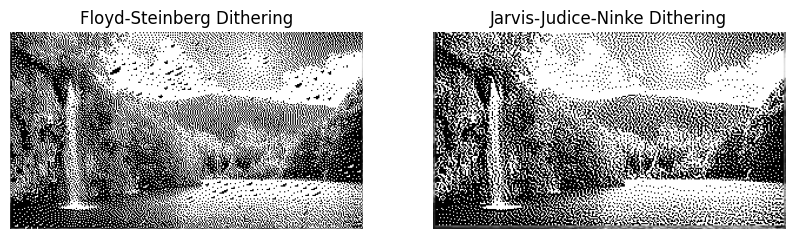

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = Image.open('Nature.jpeg').convert('L')
image_array = np.array(image)

def floyd_steinberg_dithering(img):
    """Applies Floyd-Steinberg dithering to the image."""
    for y in range(img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            old_pixel = img[y, x]
            new_pixel = 255 * round(old_pixel / 255)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y, x + 1] += error * 7 / 16
            img[y + 1, x - 1] += error * 3 / 16
            img[y + 1, x] += error * 5 / 16
            img[y + 1, x + 1] += error * 1 / 16
    return img

def jjn_dithering(img):
    """Applies Jarvis-Judice-Ninke dithering to the image."""
    kernel = np.array([
        [0, 0, 0, 7, 5],
        [3, 5, 7, 5, 3],
        [1, 3, 5, 3, 1]
    ]) / 48.0

    img = img.astype(float)
    for y in range(img.shape[0] - 3):
        for x in range(2, img.shape[1] - 2):
            old_pixel = img[y, x]
            new_pixel = 255 * round(old_pixel / 255)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y:y+3, x-2:x+3] += error * kernel
    return np.clip(img, 0, 255).astype(np.uint8)

# Apply both dithering methods
floyd_result = floyd_steinberg_dithering(image_array.copy())
jjn_result = jjn_dithering(image_array.copy())

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(floyd_result, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(jjn_result, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.show()


Question 3: Kuwahara Filter in Python

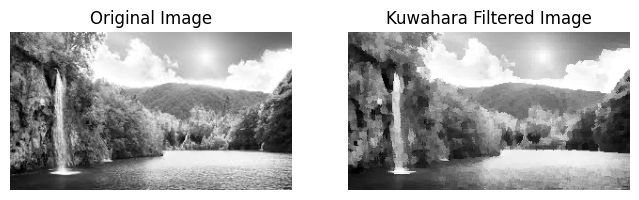

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def kuwahara_filter(img, window_size=5):
    """Applies Kuwahara filter to the input image."""
    offset = window_size // 2
    padded_img = np.pad(img, ((offset, offset), (offset, offset)), mode='symmetric')
    output = np.zeros_like(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            regions = [
                padded_img[y:y+offset+1, x:x+offset+1],
                padded_img[y:y+offset+1, x+offset+1:x+2*offset+1],
                padded_img[y+offset+1:y+2*offset+1, x:x+offset+1],
                padded_img[y+offset+1:y+2*offset+1, x+offset+1:x+2*offset+1]
            ]
            variances = [np.var(region) for region in regions]
            output[y, x] = np.mean(regions[np.argmin(variances)])
    return output

# Load the image and convert to grayscale
image = cv2.imread('Nature.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Kuwahara filter
kuwahara_result = kuwahara_filter(image, 5)

# Display the result
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kuwahara_result, cmap='gray')
plt.title('Kuwahara Filtered Image')
plt.axis('off')

plt.show()


Question 4: Fourier Transform with Butterworth and Gaussian Filters in Python

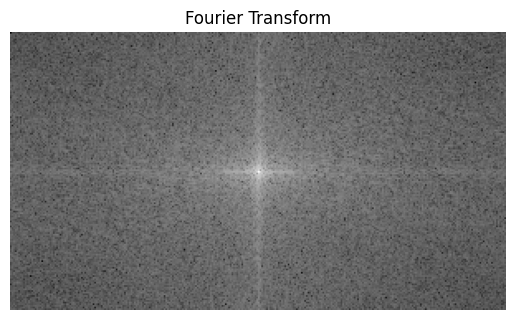

Image shape: (168, 300)
Butterworth filter shape: (168, 300)


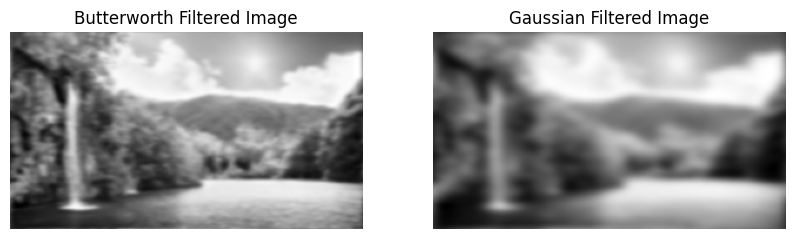

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('Nature.jpeg', cv2.IMREAD_GRAYSCALE)

# Get the shape of the image
shape = image.shape  # (rows, cols)

# Apply Fourier Transform and shift the zero frequency component to the center
f_transform = np.fft.fftshift(np.fft.fft2(image))

# Display the Fourier Transform
plt.figure()
plt.imshow(np.log(1 + np.abs(f_transform)), cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()

# Butterworth Low-Pass Filter function
def butterworth_filter(shape, cutoff, order):
    P, Q = shape  # Image dimensions
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(v, u)  # Note the order (v, u) to match shape
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

# Gaussian Low-Pass Filter function
def gaussian_filter(shape, sigma):
    P, Q = shape  # Image dimensions
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(v, u)  # Note the order (v, u) to match shape
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2) / (2 * sigma**2))
    return H

# Create Butterworth and Gaussian filters with matching shape
butter_filter = butterworth_filter(shape, cutoff=30, order=2)
gaussian_filter_result = gaussian_filter(shape, sigma=10)

# Ensure the shapes match
print("Image shape:", f_transform.shape)
print("Butterworth filter shape:", butter_filter.shape)

# Apply the filters to the Fourier-transformed image
butter_filtered = f_transform * butter_filter
gaussian_filtered = f_transform * gaussian_filter_result

# Inverse Fourier Transform to get the filtered images
butter_result = np.fft.ifft2(np.fft.ifftshift(butter_filtered))
gaussian_result = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered))

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(butter_result), cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(gaussian_result), cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.show()
